## Multinomial Logistic Regression Model for Obesity Level classification

## Part 1.1: Implement  multinomial logistic regression using softmax from scratch

### Logistic regression
Logistic regression uses an equation as the representation, very much like linear regression.

Input values (x) are combined linearly using weights or coefficient values (referred to as W) to predict an output value (y). A key difference from linear regression is that the output value being modeled is a binary values (0 or 1) rather than a continuous value.<br>

###  $\hat{y}(w, x) = \frac{1}{1+exp^{-(w_0 + w_1 * x_1 + ... + w_p * x_p)}}$

<br>

### Multiclass Logistic regression using Softmax

The softmax function, also known as softargmax or normalized exponential function, is a generalization of the logistic function to multiple dimensions. It is used in multinomial logistic regression and is often used as the last activation function of a neural network.

${\displaystyle \sigma (\mathbf {z} )_{i}={\frac {e^{z_{i}}}{\sum _{j=1}^{K}e^{z_{j}}}}{\text{ for }}i=1,\dotsc ,K{\text{ and }}\mathbf {z} =(z_{1},\dotsc ,z_{K})\in \mathbb {R} ^{K}}$

Here K is the number of class and each zi is calculated using 

$z_i = w_0 + w_1 * x_1 + ... + w_p * x_p$


#### Dataset
The dataset is available at <strong>"data/obesity_data.csv"</strong> in the respective challenge's repo.<br>
<strong>Original Source:</strong> https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. <br><br>


#### Features (X)

1. Gender {Female,Male}
2. Age {numeric}
3. Height {numeric}
4. Weight {numeric}
5. family_history_with_overweight: Has a family member suffered or suffers from overweight? {yes,no}
6. FAVC : Do you eat high caloric food frequently? {yes,no}
7. FCVC : Do you usually eat vegetables in your meals? {numeric}
8. NCP : How many main meals do you have daily? {numeric}
9. CAEC : Do you eat any food between meals? {no,Sometimes,Frequently,Always}
10. SMOKE : Do you smoke? {yes,no}
11. CH2O : How much water do you drink daily? {numeric}
12. SCC : Do you monitor the calories you eat daily? {yes,no}
13. FAF : How often do you have physical activity? {numeric}
14. TUE : How much time do you use technological devices such as cell phone, videogames, television, computer and others? {numeric}
15. CALC : how often do you drink alcohol? {no,Sometimes,Frequently,Always}
16. MTRANS : Daily Transportation {Automobile,Motorbike,Bike, Public_Transportation,Walking}

Take a look above at the source of the original dataset for more details.

#### Target (y)
17. NObeyesdad {Insufficient_Weight,Normal_Weight,Overweight_Level_I,Overweight_Level_II,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III}

#### Objective
To gain understanding of multiclass classification using logistic regression through implementing the model from scratch

#### Tasks
- Download and load the data
- Add intercept column with all values=1
- Feature transformation:
    - Convert 'Gender' column to numbers where 'Female' is 1 and 'Male' is 0
    - Convert yes/no columns ['family_history_with_overweight','FAVC','SMOKE','SCC'] to 1/0
    - One-Hot encode 'MTRANS', and 'NObeyesdad' columns. *Note:* One-hot encoding class/target variable is required for comparing binary predictions during training.
    - Label encode 'CAEC', and 'CALC' columns
    - Since the features have relatively different ranges, normalize the dataset
- Define X matrix (independent features) and y matrix (target features) as numpy arrays
- Print the shape and datatype of both X and y
- Split the dataset into 80% for training and rest 20% for testing (sklearn.model_selection.train_test_split function)
- Follow logistic regression class and fill code where highlighted:
    - Write softmax function to predict probabilities for all classes
    - Write cross entropy loss function
    - Write fit function where gradient descent is implemented
    - Write predict_proba function where we predict probabilities for input data
    - Write predict function to select single class for given input from probabilities
- Train the model
- Write function for calculating accuracy
- Compute accuracy on train and test data

#### Further Fun (will not be evaluated)
- Play with learning rate and max_iterations
- Preprocess data with different feature scaling methods (i.e. scaling, normalization, standardization, etc) and observe accuracies on both X_train and X_test
- Train model on different train-test splits such as 60-40, 50-50, 70-30, 80-20, 90-10, 95-5 etc. and observe accuracies on both X_train and X_test
- Shuffle training samples with different random seed values in the train_test_split function. Check the model error for the testing data for each setup.
- Print other classification metrics such as:
    - classification report (sklearn.metrics.classification_report),
    - confusion matrix (sklearn.metrics.confusion_matrix),
    - precision, recall and f1 scores (sklearn.metrics.precision_recall_fscore_support)

#### Helpful links
- Multiclass Logistic Regression from scratch: https://gluon.mxnet.io/chapter02_supervised-learning/softmax-regression-scratch.html
- Softmax tutorial : http://deeplearning.stanford.edu/tutorial/supervised/SoftmaxRegression/
- Softmax function detailed history: https://medium.com/data-science-bootcamp/understand-the-softmax-function-in-minutes-f3a59641e86d
- Understand gradients for cross entropy loss: https://rstudio-pubs-static.s3.amazonaws.com/337306_79a7966fad184532ab3ad66b322fe96e.html
- OnevsRest (OVR) strategy for multiclass classification: https://medium.com/analytics-vidhya/logistic-regression-from-scratch-multi-classification-with-onevsall-d5c2acf0c37c
- Use slack for doubts: https://join.slack.com/t/deepconnectai/shared_invite/zt-givlfnf6-~cn3SQ43k0BGDrG9_YOn4g

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

In [ ]:
# Download the dataset from the source
!wget https://github.com/DeepConnectAI/challenge-week-4/raw/master/data/obesity_data.csv

In [2]:
# Read the data from local cloud directory
data = pd.read_csv("obesity_data.csv")
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.000000,1.620000,53.000000,no,yes,2.0,3.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Automobile,Normal_Weight
6,Female,23.000000,1.500000,55.000000,yes,yes,3.0,3.0,Sometimes,no,2.000000,no,1.000000,0.000000,Sometimes,Motorbike,Normal_Weight
7,Male,22.000000,1.640000,53.000000,no,no,2.0,3.0,Sometimes,no,2.000000,no,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.000000,1.780000,64.000000,yes,yes,3.0,3.0,Sometimes,no,2.000000,no,1.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
9,Male,22.000000,1.720000,68.000000,yes,yes,2.0,3.0,Sometimes,no,2.000000,no,1.000000,1.000000,no,Public_Transportation,Normal_Weight


In [3]:
# Add the intercept column with all values 1
data.insert(0,'G1',1)
data.head()

,G1,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,1,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,1,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,1,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
# Print some rows just to understand data
data.head(20)

,G1,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,1,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,1,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,1,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,1,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,1,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,1,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,1,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,1,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [ ]:
#data[['Gender']]=pd.DataFrame(np.where(data[['Gender']].values=='Female',1,0),data.index)

In [5]:
# Perform feature transformation as per the above tasks
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder 
LE = preprocessing.LabelEncoder()
CateList = data.select_dtypes(include="object").columns
print(CateList)

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


In [6]:
for i in CateList:
    data[i] = LE.fit_transform(data[i])

In [7]:
data

,G1,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3,1
1,1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3,1
2,1,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3,1
3,1,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4,5
4,1,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3,6
5,1,1,29.000000,1.620000,53.000000,0,1,2.0,3.0,2,0,2.000000,0,0.000000,0.000000,2,0,1
6,1,0,23.000000,1.500000,55.000000,1,1,3.0,3.0,2,0,2.000000,0,1.000000,0.000000,2,2,1
7,1,1,22.000000,1.640000,53.000000,0,0,2.0,3.0,2,0,2.000000,0,3.000000,0.000000,2,3,1
8,1,1,24.000000,1.780000,64.000000,1,1,3.0,3.0,2,0,2.000000,0,1.000000,1.000000,1,3,1
9,1,1,22.000000,1.720000,68.000000,1,1,2.0,3.0,2,0,2.000000,0,1.000000,1.000000,3,3,1


In [8]:
data=pd.get_dummies(data,columns=['CAEC','CALC','MTRANS','NObeyesdad'])
#data=pd.get_dummies(data,columns=['MTRANS','NObeyesdad'])
data

,G1,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,...,MTRANS_2,MTRANS_3,MTRANS_4,NObeyesdad_0,NObeyesdad_1,NObeyesdad_2,NObeyesdad_3,NObeyesdad_4,NObeyesdad_5,NObeyesdad_6
0,1,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,0,...,0,1,0,0,1,0,0,0,0,0
1,1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,...,0,1,0,0,1,0,0,0,0,0
2,1,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,0,...,0,1,0,0,1,0,0,0,0,0
3,1,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,0,...,0,0,1,0,0,0,0,0,1,0
4,1,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,0,...,0,1,0,0,0,0,0,0,0,1
5,1,1,29.000000,1.620000,53.000000,0,1,2.0,3.0,0,...,0,0,0,0,1,0,0,0,0,0
6,1,0,23.000000,1.500000,55.000000,1,1,3.0,3.0,0,...,1,0,0,0,1,0,0,0,0,0
7,1,1,22.000000,1.640000,53.000000,0,0,2.0,3.0,0,...,0,1,0,0,1,0,0,0,0,0
8,1,1,24.000000,1.780000,64.000000,1,1,3.0,3.0,0,...,0,1,0,0,1,0,0,0,0,0
9,1,1,22.000000,1.720000,68.000000,1,1,2.0,3.0,0,...,0,1,0,0,1,0,0,0,0,0


In [9]:
from sklearn import preprocessing
df=data.iloc[:,1:27]
x=df.values
mm=preprocessing.MinMaxScaler()
x1=mm.fit_transform(x)
df=pd.DataFrame(x1)
df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.148936,0.320755,0.186567,1.0,0.0,0.5,0.666667,0.0,0.500000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.148936,0.132075,0.126866,1.0,0.0,1.0,0.666667,1.0,1.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.191489,0.660377,0.283582,1.0,0.0,0.5,0.666667,0.0,0.500000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.276596,0.660377,0.358209,0.0,0.0,1.0,0.666667,0.0,0.500000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.170213,0.622642,0.379104,0.0,0.0,0.5,0.000000,0.0,0.500000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,1.0,0.319149,0.320755,0.104478,0.0,1.0,0.5,0.666667,0.0,0.500000,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.191489,0.094340,0.119403,1.0,1.0,1.0,0.666667,0.0,0.500000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7,1.0,0.170213,0.358491,0.104478,0.0,0.0,0.5,0.666667,0.0,0.500000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,1.0,0.212766,0.622642,0.186567,1.0,1.0,1.0,0.666667,0.0,0.500000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,1.0,0.170213,0.509434,0.216418,1.0,1.0,0.5,0.666667,0.0,0.500000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [10]:
data=pd.concat([df,data.iloc[:,-7:]],sort=False,axis=1)
data.insert(0,'G1',1)
data

,G1,0,1,2,3,4,5,6,7,8,...,23,24,25,NObeyesdad_0,NObeyesdad_1,NObeyesdad_2,NObeyesdad_3,NObeyesdad_4,NObeyesdad_5,NObeyesdad_6
0,1,0.0,0.148936,0.320755,0.186567,1.0,0.0,0.5,0.666667,0.0,...,0.0,1.0,0.0,0,1,0,0,0,0,0
1,1,0.0,0.148936,0.132075,0.126866,1.0,0.0,1.0,0.666667,1.0,...,0.0,1.0,0.0,0,1,0,0,0,0,0
2,1,1.0,0.191489,0.660377,0.283582,1.0,0.0,0.5,0.666667,0.0,...,0.0,1.0,0.0,0,1,0,0,0,0,0
3,1,1.0,0.276596,0.660377,0.358209,0.0,0.0,1.0,0.666667,0.0,...,0.0,0.0,1.0,0,0,0,0,0,1,0
4,1,1.0,0.170213,0.622642,0.379104,0.0,0.0,0.5,0.000000,0.0,...,0.0,1.0,0.0,0,0,0,0,0,0,1
5,1,1.0,0.319149,0.320755,0.104478,0.0,1.0,0.5,0.666667,0.0,...,0.0,0.0,0.0,0,1,0,0,0,0,0
6,1,0.0,0.191489,0.094340,0.119403,1.0,1.0,1.0,0.666667,0.0,...,1.0,0.0,0.0,0,1,0,0,0,0,0
7,1,1.0,0.170213,0.358491,0.104478,0.0,0.0,0.5,0.666667,0.0,...,0.0,1.0,0.0,0,1,0,0,0,0,0
8,1,1.0,0.212766,0.622642,0.186567,1.0,1.0,1.0,0.666667,0.0,...,0.0,1.0,0.0,0,1,0,0,0,0,0
9,1,1.0,0.170213,0.509434,0.216418,1.0,1.0,0.5,0.666667,0.0,...,0.0,1.0,0.0,0,1,0,0,0,0,0


In [11]:
# Define X (input features) and y (output feature) 
X = data.iloc[:,:-7].values
y = data.iloc[:,-7:].values

In [12]:
X_shape = X.shape
X_type  = type(X)
y_shape = y.shape
y_type  = type(y)
print(f'X: Type-{X_type}, Shape-{X_shape}')
print(f'y: Type-{y_type}, Shape-{y_shape}')

X: Type-<class 'numpy.ndarray'>, Shape-(2111, 27)
y: Type-<class 'numpy.ndarray'>, Shape-(2111, 7)


Shape of X will depend on how feature transformation is done, but number of columns should be >=17, and there should be 2111 rows.

Nevertheless, type of X must be <class 'numpy.ndarray'>

<strong>Output for y: </strong><br>

y: Type-<class 'numpy.ndarray'>, Shape-(2111,7)

In [13]:
# Split the dataset into training and testing here
# Use RNADOM STATE parameter as well to reproduce results later
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=123)

In [14]:
# Print the shape of features and target of training and testing: X_train, X_test, y_train, y_test
X_train_shape = X_train.shape
y_train_shape = y_train.shape
X_test_shape  = X_test.shape
y_test_shape  = y_test.shape

print(f"X_train: {X_train_shape} , y_train: {y_train_shape}")
print(f"X_test: {X_test_shape} , y_test: {y_test_shape}")
assert (X_train.shape[0]==y_train.shape[0] and X_test.shape[0]==y_test.shape[0]), "Check your splitting carefully"

X_train: (1688, 27) , y_train: (1688, 7)
X_test: (423, 27) , y_test: (423, 7)


##### Let us start implementing logistic regression from scratch. Just follow code cells, see hints if required.

##### We will build a LogisticRegression class

In [60]:
# DO NOT EDIT ANY VARIABLE OR FUNCTION NAME(S) IN THIS CELL
# Let's try more object oriented approach this time :)
class MyLogisticRegression:
    def __init__(self, learning_rate=0.001, max_iterations=1000):
        '''Initialize variables
        Args:
            learning_rate  : Learning Rate
            max_iterations : Max iterations for training weights
        '''
        # Initialising all the parameters
        self.learning_rate  = learning_rate
        self.max_iterations = max_iterations
        self.losses    = []
        
        # Define epsilon because log(0) is not defined
        self.eps = 1e-7

    def softmax(self, z):
        '''Softmax function
        Args:
            z : A numpy array (num_samples,num_classes)
        Returns:
            A numpy array where softmax function applied to every sample
        '''
        assert len(z.shape) == 2
        
        ### START CODE HERE
        exp = np.exp(z)
        exp_s = np.sum(exp,axis=1)
        softmax = exp/exp_s.reshape((exp_s.shape[0],1))
        ### END CODE HERE
        
        return softmax
    
    def cross_entropy_loss(self, y_true, y_pred):
        '''Compute cross_entropy_loss
        Args:
            y_true : Numpy array of actual truth values (num_samples,num_classes)
            y_pred : Numpy array of predicted values (num_samples,num_classes)
        Returns:
            Cross-entropy loss, scalar value (sum of cross entropy loss of individual classes)
        '''
        # Fix 0/1 values in y_pred so that log is not undefined
        y_pred = np.maximum(np.full(y_pred.shape, self.eps), np.minimum(np.full(y_pred.shape, 1-self.eps), y_pred))
        
        ### START CODE HERE
        # HINT: Take sum of losses of all classes
        ce_loss = -1*(np.mean(y_true*np.log(y_pred)))
        ### END CODE HERE
        
        return ce_loss
    
    def fit(self, X, y):
        '''Trains logistic regression model using gradient ascent
        to gain maximum likelihood on the training data
        Args:
            X : Numpy array (num_examples, num_features)
            y : Numpy array (num_examples, num_classes)
        Returns: VOID
        '''
        
        num_examples = X.shape[0]
        num_features = X.shape[1]
        num_classes  = y.shape[1]
        
        ### START CODE HERE
        
        # Initialize weights with appropriate shape [num_features, num_classes]
        self.weights = np.random.rand(num_features, num_classes)
        
        # Perform gradient ascent
        for i in range(self.max_iterations):
            # Define the linear hypothesis(z) first
            z = np.dot(X,self.weights)
            
            # Output probability values using softmax
            y_pred = self.softmax(z)
            
            # Compute gradient for weights assiciated with each class 
            gradient = np.dot(X.T,(y_pred-y))
            
            # Update the weights
            # Perform weight updation for each class
            self.weights -= self.learning_rate*gradient
            
            # Calculate loss
            loss = self.cross_entropy_loss(y,y_pred)

            self.losses.append(loss)
    
        ### END CODE HERE
    
    def predict_proba(self, X):
        '''Predict probabilities for given X.
        Remember sigmoid returns value between 0 and 1.
        Args:
            X : Numpy array (num_samples, num_features)
        Returns:
            probabilities: Numpy array (num_samples,num_classes)
        '''
        if self.weights is None:
            raise Exception("Fit the model before prediction")
        
        ### START CODE HERE
        z = np.dot(X,self.weights)
        probabilities = self.softmax(z)
        ### END CODE HERE
        
        return probabilities
    
    def predict(self, X):
        '''Predict/Classify X in classes
        Args:
            X         : Numpy array (num_samples, num_features)
        Returns:
            binary_predictions : Numpy array (num_samples, num_classes)
        '''
        
        ### START CODE HERE
        # HINT: Choose maximum probability (Set value to 1 and rest 0) to predict binary values using np.argmax() function
        
        y_pred = self.predict_proba(X)
        binary_predictions = np.zeros_like(y_pred)
        binary_predictions[np.arange(y_pred.shape[0]),np.argmax(y_pred,axis=1)]=1
        
        ### END CODE HERE
        
        return binary_predictions

In [61]:
# Now initialize multinomial logitic regression implemented by you
model = MyLogisticRegression()

In [62]:
# And now fit on training data
model.fit(X_train,y_train)

##### Phew!! That's a lot of code. But you did it, congrats !!

In [63]:
# Train log-likelihood
train_loss = model.cross_entropy_loss(y_train, model.predict_proba(X_train))
print("Loss on training data:", train_loss)

Loss on training data: 0.09907222743944746


In [64]:
# Test log-likelihood
test_loss = model.cross_entropy_loss(y_test, model.predict_proba(X_test))
print("Loss on testing data:", test_loss)

Loss on testing data: 0.10152341991330989


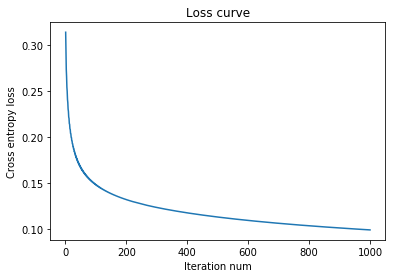

In [65]:
# Plot the loss curve
plt.plot([i+1 for i in range(len(model.losses))], model.losses)
plt.title("Loss curve")
plt.xlabel("Iteration num")
plt.ylabel("Cross entropy loss")
plt.show()

##### Let's calculate accuracy as well. Accuracy is defined simply as the rate of correct classifications.

In [66]:
def accuracy(y_true,y_pred):
    '''Compute accuracy.
    Accuracy = (Correct prediction / number of samples)
    Args:
        y_true : Truth binary values (num_examples, num_classes)
        y_pred : Predicted binary values (num_examples, num_classes)
    Returns:
        accuracy: scalar value
    '''
    
    ### START CODE HERE
    
    accuracy = np.sum(y_true==y_pred)/y_true.size
    ### END CODE HERE
    return accuracy

In [67]:
# Print accuracy on train data
y_pred = model.predict(X_train)
accuracy(y_train,y_pred)

0.936357481381178

In [68]:
# Print accuracy on test data
y_pred = model.predict(X_test)
accuracy(y_test,y_pred)

0.9365079365079365

## Part 1.2: Use Logistic Regression from sklearn on the same dataset

#### Tasks
- Define X and y again for sklearn Linear Regression model
- <strong>Note:</strong>
    - Column at position 0 with all values=1 is not required. (Handled by scikit-learn built-in class)
    - One-hot encoding of the target column is not required. (Handled by scikit-learn built-in class)
    - Don't scale/normalize the target column, let them be whole numbers 0,1,2,... (sklearn does not recognize continuous values as categories)
- Train Logistic Regression Model on the training set (sklearn.linear_model.LogisticRegression class)
- Run the model on testing set
- Print 'accuracy' obtained on the testing dataset (sklearn.metrics.accuracy_score function)

#### Further fun (will not be evaluated)
- Compare accuracies of your model and sklearn's logistic regression model

#### Helpful links
- Classification metrics in sklearn: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
- Feature Scaling: https://scikit-learn.org/stable/modules/preprocessing.html

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [147]:
data=pd.read_csv("obesity_data.csv")
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [148]:
# Perform data loading and preprocessing here suitable for sklearn model
# See above note in tasks to minimize implementation errors
LE = preprocessing.LabelEncoder()
CateList = data.select_dtypes(include="object").columns
print(CateList)

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


In [149]:
for i in CateList:
    data[i] = LE.fit_transform(data[i])
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [150]:
from sklearn import preprocessing
df=data.loc[:,data.columns!='NObeyesdad']
x=df.values
mm=preprocessing.MinMaxScaler()
x1=mm.fit_transform(x)
df=pd.DataFrame(x1)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.148936,0.320755,0.186567,1.0,0.0,0.5,0.666667,0.666667,0.0,0.5,0.0,0.000000,0.5,1.000000,0.75
1,0.0,0.148936,0.132075,0.126866,1.0,0.0,1.0,0.666667,0.666667,1.0,1.0,1.0,1.000000,0.0,0.666667,0.75
2,1.0,0.191489,0.660377,0.283582,1.0,0.0,0.5,0.666667,0.666667,0.0,0.5,0.0,0.666667,0.5,0.333333,0.75
3,1.0,0.276596,0.660377,0.358209,0.0,0.0,1.0,0.666667,0.666667,0.0,0.5,0.0,0.666667,0.0,0.333333,1.00
4,1.0,0.170213,0.622642,0.379104,0.0,0.0,0.5,0.000000,0.666667,0.0,0.5,0.0,0.000000,0.0,0.666667,0.75


In [151]:
data=pd.concat([df,data['NObeyesdad']],sort=False,axis=1)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,NObeyesdad
0,0.0,0.148936,0.320755,0.186567,1.0,0.0,0.5,0.666667,0.666667,0.0,0.500000,0.0,0.000000,0.500000,1.000000,0.75,1
1,0.0,0.148936,0.132075,0.126866,1.0,0.0,1.0,0.666667,0.666667,1.0,1.000000,1.0,1.000000,0.000000,0.666667,0.75,1
2,1.0,0.191489,0.660377,0.283582,1.0,0.0,0.5,0.666667,0.666667,0.0,0.500000,0.0,0.666667,0.500000,0.333333,0.75,1
3,1.0,0.276596,0.660377,0.358209,0.0,0.0,1.0,0.666667,0.666667,0.0,0.500000,0.0,0.666667,0.000000,0.333333,1.00,5
4,1.0,0.170213,0.622642,0.379104,0.0,0.0,0.5,0.000000,0.666667,0.0,0.500000,0.0,0.000000,0.000000,0.666667,0.75,6
5,1.0,0.319149,0.320755,0.104478,0.0,1.0,0.5,0.666667,0.666667,0.0,0.500000,0.0,0.000000,0.000000,0.666667,0.00,1
6,0.0,0.191489,0.094340,0.119403,1.0,1.0,1.0,0.666667,0.666667,0.0,0.500000,0.0,0.333333,0.000000,0.666667,0.50,1
7,1.0,0.170213,0.358491,0.104478,0.0,0.0,0.5,0.666667,0.666667,0.0,0.500000,0.0,1.000000,0.000000,0.666667,0.75,1
8,1.0,0.212766,0.622642,0.186567,1.0,1.0,1.0,0.666667,0.666667,0.0,0.500000,0.0,0.333333,0.500000,0.333333,0.75,1
9,1.0,0.170213,0.509434,0.216418,1.0,1.0,0.5,0.666667,0.666667,0.0,0.500000,0.0,0.333333,0.500000,1.000000,0.75,1


In [152]:
#data.insert(0,'G1',1)

In [153]:
# Define X and y
X_s = data.iloc[:,:-1].values
y_s = data.iloc[:,-1:].values

In [154]:
print(X_s.shape)
print(y_s.shape)

(2111, 17)
(2111, 1)


In [155]:
X_s_train, X_s_test, y_s_train, y_s_test=train_test_split(X_s,y_s,test_size=0.2,random_state=123)

In [156]:
model=LogisticRegression()

In [157]:
model.fit(X_s_train,y_s_train)

C:\Users\TANVI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [158]:
# Predict on testing set X_test
y_s_pred = model.predict(X_s_test)

In [159]:
# Print Accuracy on testing set
test_accuracy_sklearn = model.score(X_s_test,y_s_test)

print(f"\nAccuracy on testing set: {test_accuracy_sklearn}")


Accuracy on testing set: 0.706855791962175
